In [1]:
# This code is using CNN for denoising image data. MNIST dataset is used for this task.
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# The preprocessing step. Normalizes the images. If noise is True, it will add noise to the images with the defined noise factor.
def preprocessing(data, noise_factor = 0.1, noise = False):
    data_normalized = np.expand_dims(data / 255.0, axis = -1)
    if noise:
        data_normalized = data_normalized + noise_factor * np.random.normal(
        loc = 0, scale = 1, size = data_normalized.shape)
    data_normalized = np.clip(data_normalized, 0.0, 1.0)
    return data_normalized

# Preprocessing data

In [56]:
(train, _), (test, _) = tf.keras.datasets.mnist.load_data()
train_data = preprocessing(train)
test_data = preprocessing(test)
train_data_noisy = preprocessing(train, noise_factor = 0.3, noise = True)
test_data_noisy = preprocessing(test, noise_factor = 0.3, noise = True)

# Creating model

In [57]:
# Creating encoder and decord to get the same size data in the end.
#encoder:
x_input = tf.keras.layers.Input(shape = train_data[0].shape)
x = tf.keras.layers.Conv2D(32, 3, activation = "relu", padding = "same")(x_input)
x = tf.keras.layers.MaxPooling2D(2, padding = "same")(x)
x = tf.keras.layers.Conv2D(32, 3, activation = "relu", padding = "same")(x)
x = tf.keras.layers.MaxPooling2D(2, padding = "same")(x)

# Decoder:
x = tf.keras.layers.Conv2DTranspose(32, 3, strides = 2, activation = "relu", padding = "same")(x)
x = tf.keras.layers.Conv2DTranspose(32, 3, strides = 2, activation = "relu", padding = "same")(x)
output = tf.keras.layers.Conv2D(1, 3, activation = "sigmoid", padding = "same")(x)

# Creating model:
noise_cancellation_model = tf.keras.Model(x_input, output)
noise_cancellation_model.compile(optimizer="adam", loss="binary_crossentropy")



# Training

In [58]:
# The training data is the created noisy images, and the target is the image before adding noise.
epochs = 50
batch_size = 128
noise_cancellation_model.fit(train_data_noisy,
                            train_data,
                            epochs = epochs,
                            batch_size = batch_size,
                            shuffle = True,
                            validation_data = (test_data_noisy, test_data) )

Epoch 1/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1687 - val_loss: 0.0932
Epoch 2/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0902 - val_loss: 0.0867
Epoch 3/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0863 - val_loss: 0.0844
Epoch 4/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0845 - val_loss: 0.0830
Epoch 5/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0833 - val_loss: 0.0823
Epoch 6/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0825 - val_loss: 0.0817
Epoch 7/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0819 - val_loss: 0.0810
Epoch 8/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0814 - val_loss: 0.0807
Epoch 9/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0810 - val_loss: 0.0803
Epoch 10/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0807 - val_loss: 0.0800

# Plotting images

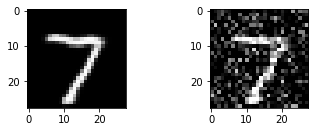

In [60]:
ax = plt.subplot(2, 2, 1)
plt.imshow(predictions[0].reshape(28, 28))
plt.gray()
ax = plt.subplot(2, 2, 2)
plt.imshow(test_data_noisy[0].reshape(28, 28))
plt.gray()
plt.show()